(3, 900, 900)
[  0 150 150]
(3, 1000, 1000)
(1000, 1000, 3)


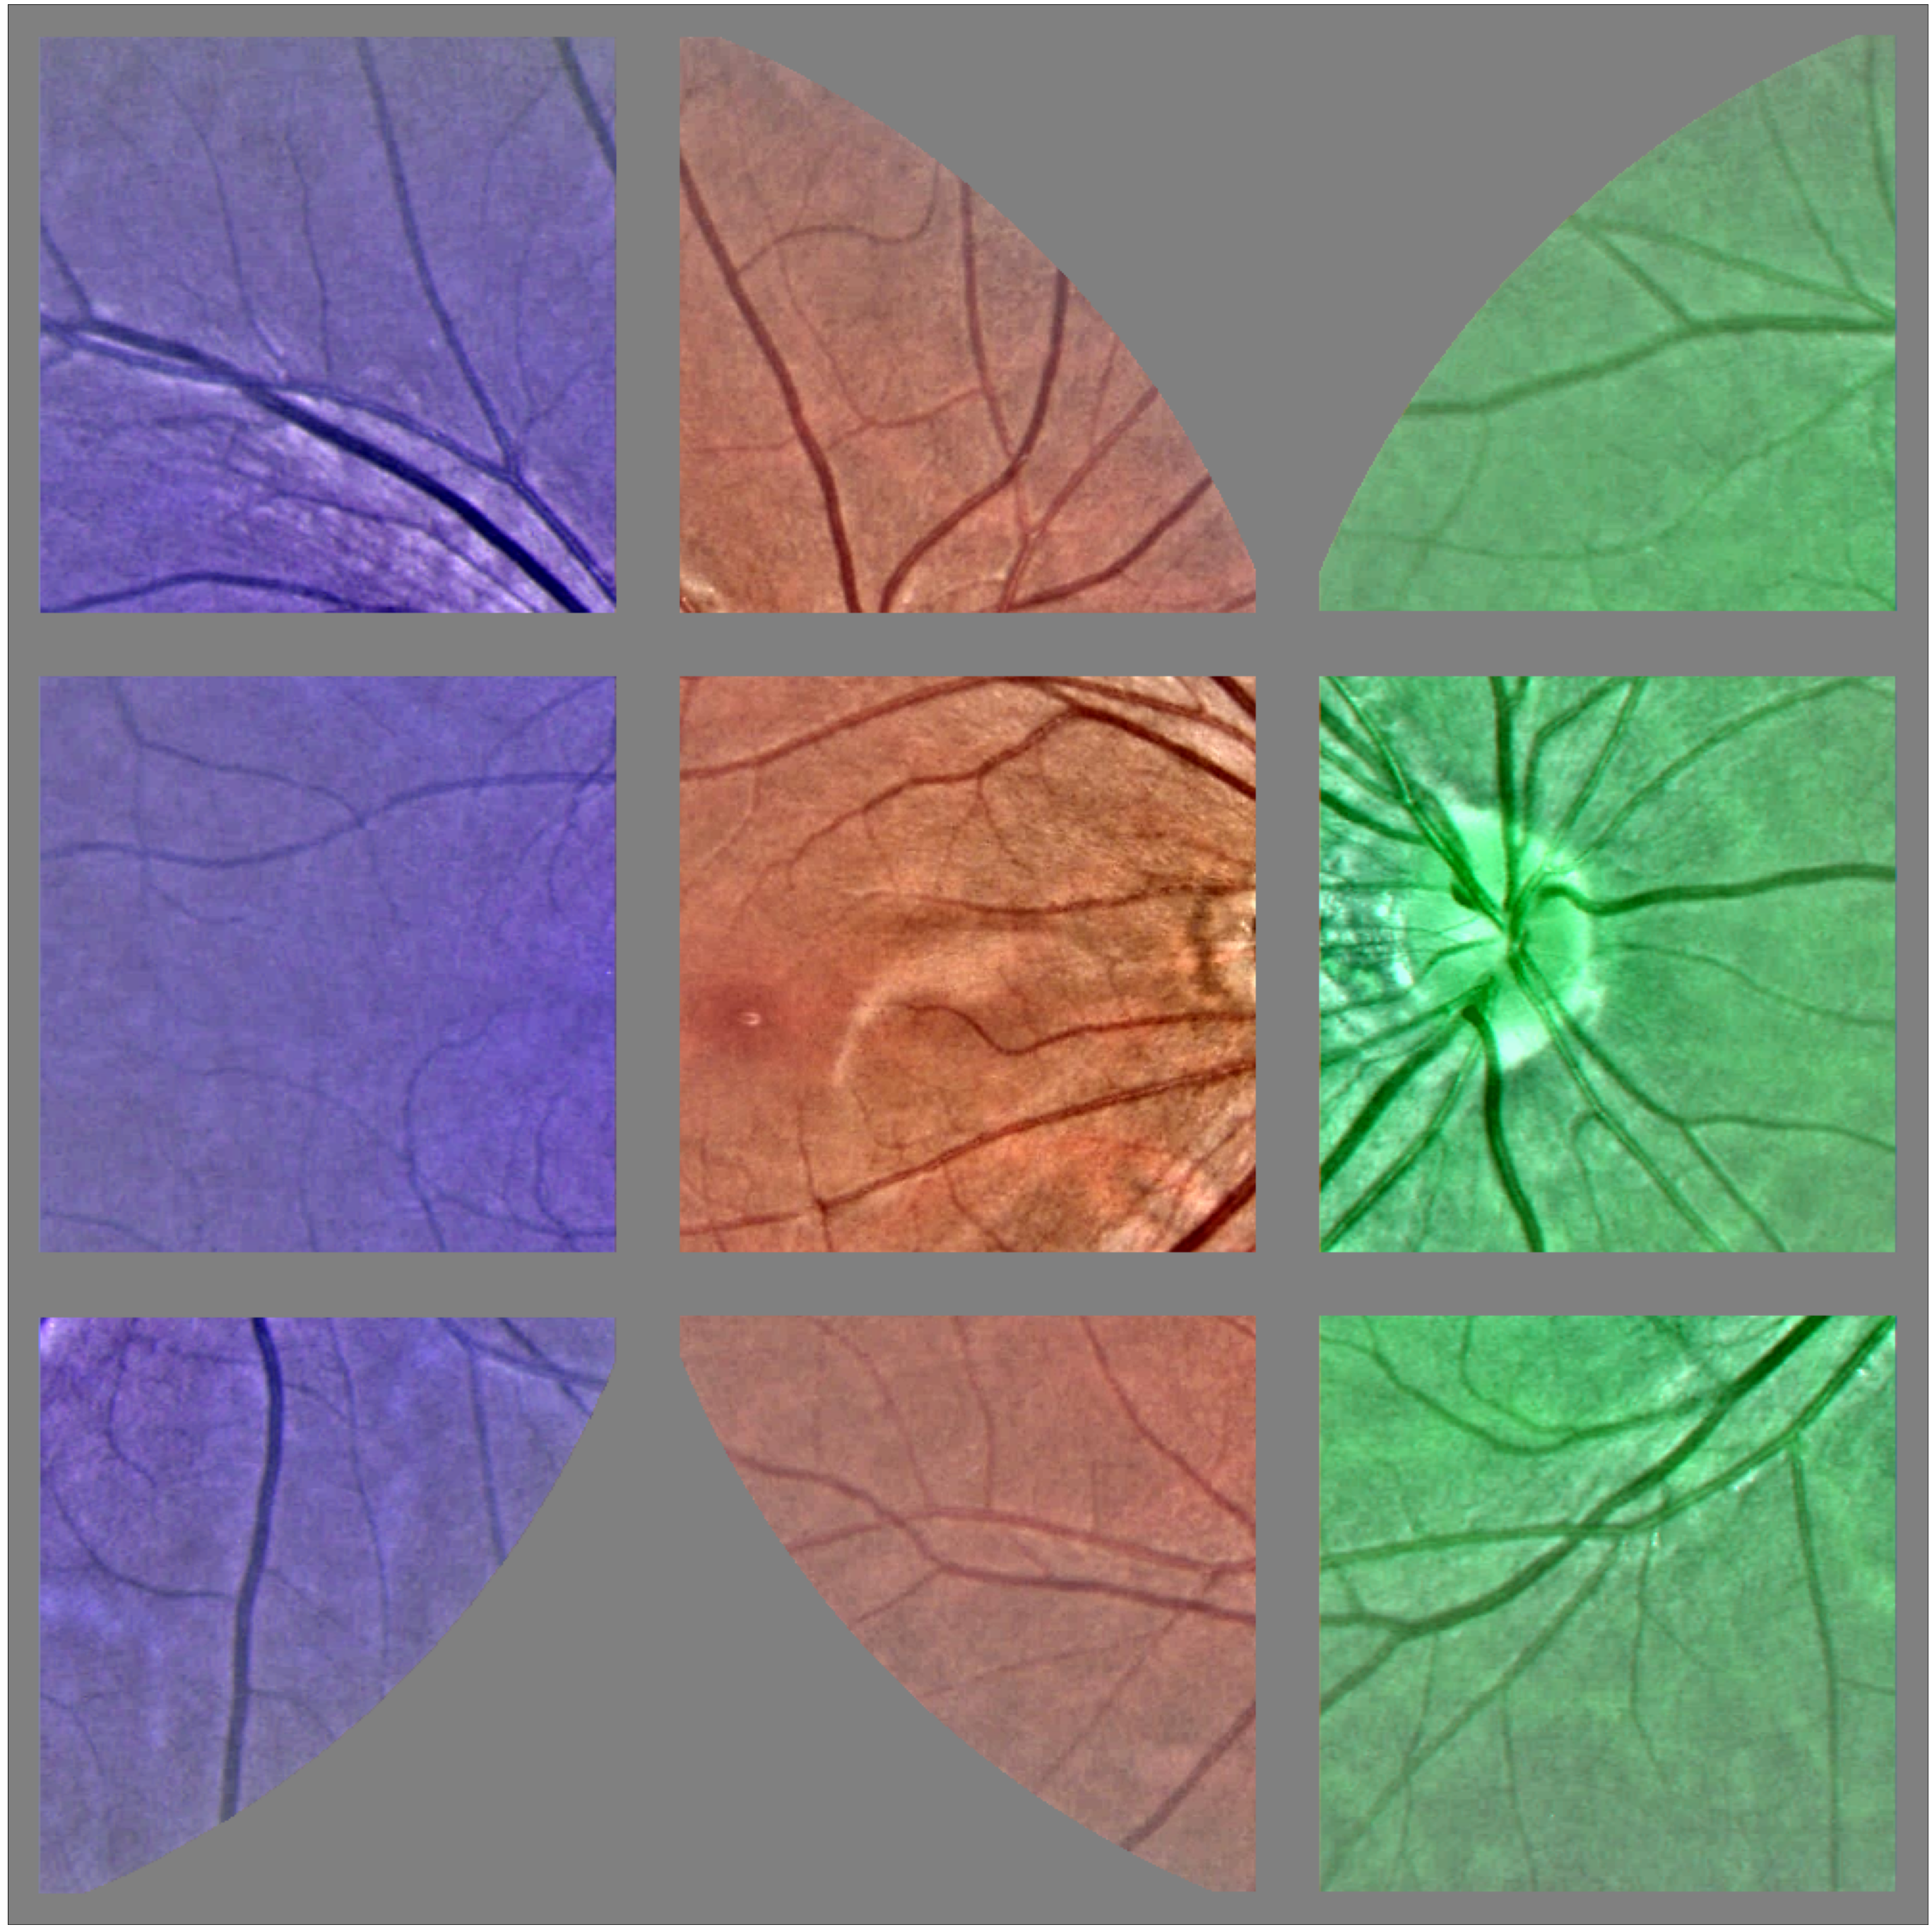

In [489]:
from skimage.util import view_as_blocks, view_as_windows
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import math
import torch
from PIL import Image 

listOfFiles = ['/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002.png']
patch_size = (3, 250, 250)

fundus_img = Image.open(listOfFiles[0]).convert("RGB")

img = asarray(fundus_img)
img = img.reshape(
            [img.shape[2], img.shape[1], img.shape[0]]).astype("uint8")

fig = plt.figure(figsize=(50., 50.))

list_patches = []
block_shape = np.array(patch_size)

print(img.shape)
# print(patch_size)
npads = np.array(img.shape) % block_shape 

print(npads)
# padded_img = np.zeros((img.shape[0]+(patch_size[0]-npads[0]), img.shape[1]+(patch_size[1]-npads[1]), img.shape[2]+(patch_size[2]-npads[2])))
# padded_img[:shape[0],:shape[1],:shape[2]] = img


padded_img = np.pad(img, (
                          ((patch_size[0]-npads[0])//2,(patch_size[0]-npads[0])//2) if npads[0] != 0 else (0,0),
                          ((patch_size[1]-npads[1])//2,(patch_size[1]-npads[1])//2) if npads[1] != 0 else (0,0),
                          ((patch_size[2]-npads[2])//2,(patch_size[2]-npads[2])//2) if npads[2] != 0 else (0,0)),
                        constant_values=128)
print(padded_img.shape)
padded_img = padded_img.reshape(
    [padded_img.shape[2], padded_img.shape[1], padded_img.shape[0]]).astype("uint8")

plt.imshow(padded_img)
plt.xticks([])
plt.yticks([])

print(padded_img.shape)


patch_tosave = np.array(padded_img, copy=True)
# patch_tosave = patch_tosave.reshape(
#     [patch_tosave.shape[2], patch_tosave.shape[1], patch_tosave.shape[0]]).astype("uint8")
# print(patch_tosave.shape)
data = Image.fromarray(patch_tosave)
data.save(f'./weights/padded_img_val.png')

# nblocks = np.array(padded_img.shape) // block_shape  # integer division
# print(nblocks)


# grid = ImageGrid(fig, 111,  # similar to subplot(111)
#                  nrows_ncols=(nblocks[0], nblocks[1]),  # creates 2x2 grid of axes
#                  axes_pad=0.1 )  # pad between axes in inch.

# crop_r, crop_c, crop_ch = nblocks * block_shape
# # # cropped_img = img[:crop_r, :crop_c, :crop_ch]
# Blocks = view_as_blocks(padded_img, block_shape=patch_size)
# # Blocks = view_as_windows(padded_img, block_shape=patch_size)
# print(Blocks.shape)
# flatten_view = Blocks.reshape(Blocks.shape[0], Blocks.shape[1], -1)
# print(flatten_view.shape)    
# #     print(len(Blocks))
# for ind_row, row_patch in enumerate(flatten_view):
#     for ind_col, row_col_patch in enumerate(row_patch):
# #         print(row_col_patch.shape)
#         row_col_patch = row_col_patch.reshape(patch_size)
# #         img_name = '/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0001/0001-{}-{}.png'.format(ind_row, ind_col)
# #         print(img_name)
# #         cv2.imwrite(img_name, row_col_patch)
#         list_patches.append(row_col_patch)
# #         print(row_col_patch.shape)

# for ax, im in zip(grid, list_patches):
#     ax.imshow(im)



In [ ]:
   
import nibabel as nib

listOfFiles = ['/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002.nii.gz']
patch_size = (1, 256, 224, 224)

volume = nib.load(listOfFiles[0])

list_patches = []
block_shape = np.array(patch_size)
print(volume.shape)
npads = np.array(volume.shape) % block_shape
print(npads)

new_shape = (
    ((patch_size[0] - npads[0]) // 2, (patch_size[0] - npads[0]) // 2) if npads[1] != 0 else (0, 0),
    ((patch_size[1] - npads[1]) // 2, (patch_size[1] - npads[1]) // 2) if npads[1] != 0 else (0, 0),
    ((patch_size[2] - npads[2]) // 2, (patch_size[2] - npads[2]) // 2) if npads[2] != 0 else (0, 0),
    ((patch_size[3] - npads[3]) // 2, (patch_size[3] - npads[3]) // 2) if npads[3] != 0 else (0, 0))
print(new_shape)
padded_vol = np.pad(volume.cpu(), new_shape, constant_values=128)
print(padded_vol.shape)

Blocks = skimage.util.view_as_blocks(padded_vol, block_shape=patch_size)
# Blocks = view_as_windows(padded_img, block_shape=patch_size)

c_dim, z_dim, h_dim, w_dim, *_ = Blocks.shape
for ind_c in range(c_dim):
    for ind_z in range(z_dim):
        for ind_h in range(h_dim):
            for ind_w in range(w_dim):
                patch = Blocks[ind_c, ind_z, ind_h, ind_w]
                list_patches.append(patch)
                img_name = '/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002-{}-{}-{}-{}.nii.gz'.format(ind_c, ind_z, ind_h, ind_w)
                print(img_name)
                img = nib.Nifti1Image(patch, np.eye(4))
                nib.save(img, img_name)

# plt.show()

(900, 900, 3)
(900, 900, 3)
(512, 512, 3)
(3, 512, 512)


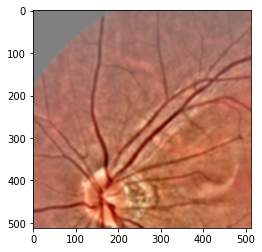

In [472]:
import math
import torch
import albumentations as A
import volumentations as V
import matplotlib.pyplot as plt

from albumentations.pytorch import ToTensorV2
from PIL import Image 
from numpy import asarray


def get_augmentation_image(patch_size):
#     return V.Compose([
#         V.RandomCrop(patch_size),
#         # HorizontalFlip(p=0.5),
#         # VerticalFlip(p=0.5),
#         # RandomRotate90(p=0.5),
#         # Blur(p=0.3),
#         # CLAHE(p=0.3),
#         # ColorJitter(p=0.3),
#         # CoarseDropout(max_holes=12, max_height=20, max_width=20, p=0.3),
#         # Affine(shear=30, rotate=0, p=0.2, mode="constant"),
#         # ToTensorV2(),
#     ], p=1.0)
    return A.Compose([
        A.RandomCrop(height=patch_size[1], width=patch_size[2]),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Blur(p=0.3),
        A.CLAHE(p=0.3),
        A.ColorJitter(p=0.3),
        A.CoarseDropout(max_holes=12, max_height=20, max_width=20, p=0.3),
        A.Affine(shear=10, rotate=0, p=0.2),
#         ToTensorV2(),
    ], p=1.0)


listOfFiles = ['/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002.png']

aug = get_augmentation_image((3, 512, 512))

fundus_img = Image.open(listOfFiles[0]).convert("RGB")
img = asarray(fundus_img)
print(img.shape)
# plt.imshow(img)
# img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])

# img = cv2.imread(listOfFiles[0])

# img = img.reshape([img.shape[2], img.shape[0], img.shape[1]])
print(img.shape)
data = {'image': img}
aug_data = aug(**data)
fundus_img = aug_data['image']
print(fundus_img.shape)

plt.imshow(fundus_img)

fundus_img = fundus_img.reshape([fundus_img.shape[2], fundus_img.shape[1], fundus_img.shape[0]])
print(fundus_img.shape)

(256, 224, 512)
(256, 224, 512) 254.0
[[[  0.  72.  51. ...  63.  50.   0.]
  [  0.  69.  56. ...  76.  55.   0.]
  [  0.  66.  61. ...  99.  62.   0.]
  ...
  [  0.  50.  64. ... 108. 107.   0.]
  [  0.  59.  67. ...  77. 116.   0.]
  [  0.  60.  77. ... 109. 116.   0.]]

 [[  0.  57.  56. ...  37.  69.   0.]
  [  0.  59.  76. ...  80.  59.   0.]
  [  0.  73.  94. ...  87.  83.   0.]
  ...
  [  0.  88. 102. ... 103.  66.   0.]
  [  0.  93.  94. ... 100.  89.   0.]
  [  0. 101.  88. ...  82. 103.   0.]]

 [[  0.   0.  58. ...  76.  58.   0.]
  [  0.   0.  55. ...  59.  54.   0.]
  [  0.   0.  56. ...  74.  78.   0.]
  ...
  [  0.   0.  92. ... 114. 112.   0.]
  [  0.   0.  83. ... 124. 113.   0.]
  [  0.   0.  93. ... 128. 113.   0.]]

 ...

 [[  0.  63.  62. ...  74.  51.   0.]
  [  0.  78.  78. ...  72.  58.   0.]
  [  0.  84.  77. ...  66.  63.   0.]
  ...
  [  0.  63.  82. ...  61.  84.   0.]
  [  0.  65.  84. ...  60.  67.   0.]
  [  0.  73.  86. ...  75.  74.   0.]]

 [[  0.  63.

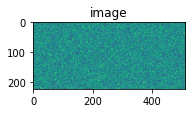

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from volumentations import *
import SimpleITK as sitk
import nibabel as nib

def view_batch(imgs, lbls=None):
    '''
    imgs: [D, H, W, C], the depth or batch dimension should be the first.
    '''
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
#     ax2 = fig.add_subplot(122)
    ax1.set_title('image')
#     ax2.set_title('label')
    """
    if init with zeros, the animation may not update? seems bug in animation.
    """
    print(imgs)
    img1 = ax1.imshow(np.random.rand(*imgs.shape[1:]))
#     img2 = ax2.imshow(np.random.rand(*lbls.shape[1:]))
    def update(i):
        plt.suptitle(str(i))
        
        img1.set_data(imgs[i])
#         img2.set_data(lbls[i])
        return img1#, img2
    ani = animation.FuncAnimation(fig, update, frames=len(imgs), interval=10, blit=False, repeat_delay=0)
    plt.show()

patch_size = (32, 160, 256)

img = nib.load('/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002.nii.gz').get_fdata()
#lbl = nib.load('data/lbl.nii').get_fdata()

# img = sitk.ReadImage('/home/harddrive/Projects/GAMMA_data/training_data/classification_F_900_900_OCT_512_224_256_Seg_True/0002/0002.nii.gz')
# img = sitk.GetArrayFromImage(img)
# lbl = sitk.ReadImage('data/lbl.nii')
# lbl = sitk.GetArrayFromImage(lbl)

# add grids
"""
h, w, d = img.shape
for i in range(0, h, 100):
    img[i:i+10, :, :] = 10
    lbl[i:i+10, :, :] = 1
for i in range(0, w, 100):
    img[:, i:i+10, :] = 10
    lbl[:, i:i+10, :] = 1
for i in range(30, d-1, 30):
    img[:, :, i:i+5] = 10
    lbl[:, :, i:i+5] = 1
"""

print(img.shape)

# print(img.shape, lbl.shape)
#view_batch(img.transpose(2,0,1), lbl.transpose(2,0,1))

def get_augmentation():
    return Compose([
#         V.RandomCrop(patch_size)
#         RemoveEmptyBorder(always_apply=True),
#         RandomScale((0.8, 1.2)),
#         PadIfNeeded(patch_size, always_apply=True),
        #RandomCrop(patch_size, always_apply=True),
        #CenterCrop(patch_size, always_apply=True),
        #RandomCrop(patch_size, always_apply=True),
        #Resize(patch_size, always_apply=True),
#         CropNonEmptyMaskIfExists(patch_size, always_apply=True),
#         Normalize(always_apply=True),
        #ElasticTransform((0, 0.25)),
        #Rotate((-15,15),(-15,15),(-15,15)),
        #Flip(0),
        #Flip(1),
        #Flip(2),
        #Transpose((1,0,2)), # only if patch.height = patch.width
        #RandomRotate90((0,1)),
        #RandomGamma(),
        #GaussianNoise(),
    ], p=1)

aug = get_augmentation()

data = {
        'image': img,
#         'mask': lbl,
        }

# for i in range(10):
aug_data = aug(**data)
img =  aug_data['image']

#     img, lbl = aug_data['image'], aug_data['mask']
print(img.shape, np.max(img))

#     print(img.shape, lbl.shape, np.max(img), np.max(lbl))
view_batch(img)